<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Считаем-данные-и-изучим-их" data-toc-modified-id="Считаем-данные-и-изучим-их-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Считаем данные и изучим их</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

# Исследование данных с MPstats

***Задачи исследования:***

— Изучить выгрузку по поставщикам купальников.

— Выделить топ-30 товарных позиций.

— Проанализировать их.

— Подготовить отчёт для отдела закупок по наиболее потенциально прибыльным товарным позициям.

***Импорт библиотек:***

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Считаем данные и изучим их

In [125]:
data = pd.read_csv('data.csv', sep=';', index_col=False, dtype='unicode', decimal=",")

In [126]:
data.head()

,SKU,Name,Category,Brand,Seller,Color,Balance,Balance FBS,Comments,Final price,...,05.03.2023 Stocks,06.03.2023 Stocks,07.03.2023 Stocks,08.03.2023 Stocks,09.03.2023 Stocks,10.03.2023 Stocks,11.03.2023 Stocks,12.03.2023 Stocks,13.03.2023 Stocks,14.03.2023 Stocks
0,84982268,Слитный Купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,GROSSISTA,ООО ИН Тайм,черный,4469,0,6104,798,...,4230,4537,4364,4102,4272,4356,4457,4694,4697,4469
1,3454022,Купальник слитный женский,Женщинам/Пляжная мода/Купальники/Слитный купал...,KICKERS,ООО Викториас Лайн,черный,9631,0,25116,833,...,11619,11382,11202,10924,10533,10820,10539,10166,9840,9631
2,59154199,Купальник раздельный с высокой талией,Женщинам/Пляжная мода/Купальники/Раздельный ку...,Sheldi,ИП Шеленина Юлия Анатольевна,"голубой,белый",459,0,266,4435,...,554,517,490,460,404,370,471,0,503,459
3,126994162,Слитный купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,EDGE PLANET,ООО ИН Тайм,NaN,1433,0,967,746,...,1363,1456,1315,1186,1375,1446,1380,1777,1685,1433
4,72998984,Слитный Купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,ARDIANI,ООО ИН Тайм,черный,4511,0,1555,899,...,4635,4726,4697,4638,4999,4906,4786,4680,4580,4511


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48686 entries, 0 to 48685
Columns: 138 entries, SKU to 14.03.2023 Stocks
dtypes: object(138)
memory usage: 51.3+ MB


## Предобработка данных

В датасете 138 столбцов. Из них большая часть с количеством остатков? продажами и выручкой по дням. Пока эти столбцы для анализа нам не нужны. Сделаем срез с нужными нам столбцами.

In [128]:
new_columns = []

for column in data.columns:
    if ' Stocks' not in column and ' Sales' not in column and ' Revenue' not in column:
        new_columns.append(column)
        
new_data = data[new_columns].copy()

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48686 entries, 0 to 48685
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   SKU                    48686 non-null  object
 1   Name                   48685 non-null  object
 2   Category               48686 non-null  object
 3   Brand                  48568 non-null  object
 4   Seller                 48145 non-null  object
 5   Color                  42919 non-null  object
 6   Balance                48686 non-null  object
 7   Balance FBS            48686 non-null  object
 8   Comments               48686 non-null  object
 9   Final price            48686 non-null  object
 10  Max price              48686 non-null  object
 11  Min price              48686 non-null  object
 12  Average price          48686 non-null  object
 13  Sales                  48686 non-null  object
 14  Revenue                48686 non-null  object
 15  Revenue potential  

Осталось 42 колонки. Тип данных во всех колонках один. Числовые нужно преобразовать точно.

In [129]:
for column in ['Final price', 'Max price', 'Min price', 'Average price']:
    
    new_data[column] = [x.replace(',', '.') for x in new_data[column]]
    new_data[column] = new_data[column].astype(float)

In [130]:
for column in ['Balance', 'Balance FBS', 'Comments', 'Revenue', 'Sales']:
    
    new_data[column] = new_data[column].astype('int')

Приведём названия столбцов к нижнему регистру.

In [131]:
new_data.columns = [x.lower().replace(' ', '_') for x in new_data.columns.values]

In [132]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48686 entries, 0 to 48685
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    48686 non-null  object 
 1   name                   48685 non-null  object 
 2   category               48686 non-null  object 
 3   brand                  48568 non-null  object 
 4   seller                 48145 non-null  object 
 5   color                  42919 non-null  object 
 6   balance                48686 non-null  int32  
 7   balance_fbs            48686 non-null  int32  
 8   comments               48686 non-null  int32  
 9   final_price            48686 non-null  float64
 10  max_price              48686 non-null  float64
 11  min_price              48686 non-null  float64
 12  average_price          48686 non-null  float64
 13  sales                  48686 non-null  int32  
 14  revenue                48686 non-null  int32  
 15  re

Проверим и удалим явные дубликаты.

In [133]:
new_data.duplicated().sum()

0

Посмотрим пропуски.

In [134]:
new_data.isna().sum()

sku                          0
name                         1
category                     0
brand                      118
seller                     541
color                     5767
balance                      0
balance_fbs                  0
comments                     0
final_price                  0
max_price                    0
min_price                    0
average_price                0
sales                        0
revenue                      0
revenue_potential            0
revenue_average              0
lost_profit                  0
lost_profit_percent          0
url                          0
thumb                        0
days_in_stock                0
days_with_sales              0
average_if_in_stock          0
rating                       0
basic_sale                   0
basic_sale_price             0
promo_sale                   0
base_price                   0
spp                          0
spp_price                    0
fbs                          0
subject_

Кое-где пропущены Бренд, Продавец, Страна, Цвет и пол.

## Исследовательский анализ данных

Посмотрим товары со средней ценой не ниже 1500 р, выручкой 1000000 и не менее 50 комментариев.

Нужно профильтровать все SKU по параметрам: 

- средний чек не ниже 1500р., 
- выручка более 1 млн рублей, 
- комментариев не менее 50. 

Убрать ООО из выдачи. Оставить только ИП.

In [135]:
data_1 = new_data[(new_data['comments'] >=50) & (new_data['average_price'] >=1500) & (new_data['revenue'] >=1000000)]

In [136]:
data_1.head()

,sku,name,category,brand,seller,color,balance,balance_fbs,comments,final_price,...,first_date,first_comment_date,pics_count,has_3d,hax_video,comments_valuation,card_rating,subject,purchase,purchase_after_return
2,59154199,Купальник раздельный с высокой талией,Женщинам/Пляжная мода/Купальники/Раздельный ку...,Sheldi,ИП Шеленина Юлия Анатольевна,"голубой,белый",459,0,266,4435.0,...,2022-01-22,2022-02-24,7,0,0,"4,6",80,Белье / Раздельный купальник,42,38
5,28753583,Слитный купальник женский утягивающий спорт бо...,Женщинам/Пляжная мода/Купальники/Слитный купал...,Pantacolla,ИП Суряднов Михаил Андреевич,черный,701,0,1945,2994.0,...,2021-06-08,2021-06-20,8,0,1,"4,5",100,Белье / Слитный купальник,46,41
7,111391697,Купальник слитный женский корректирующий для б...,Женщинам/Пляжная мода/Купальники/Слитный купал...,Delyamer swim,ИП Медведев А Л,черный,718,1,502,2795.0,...,2022-07-02,2022-07-05,5,0,1,"4,5",90,Белье / Слитный купальник,46,41
8,50052655,Купальник раздельный женский со шнуровкой,Женщинам/Пляжная мода/Купальники/Раздельный ку...,MIYAMI,ИП Соломянников Дмитрий Евгеньевич,"черный,чернильный",302,1,986,2799.0,...,2021-12-02,2020-06-20,7,0,0,"4,5",87,Белье / Раздельный купальник,42,38
9,110802959,Слитный сплошной закрытый купальник больших ра...,Женщинам/Пляжная мода/Купальники/Слитный купал...,ЛАУРА,ИП Кораблев Николай Алексеевич,черный,1208,0,218,2835.0,...,2022-07-04,2022-07-11,20,0,1,"4,8",80,Белье / Слитный купальник,46,41


Сохраним данные в датасет.

In [137]:
# data_1.to_csv('Downloads/SKU.csv', index=False)

Сгруппируем по категориям и посмотрим продажи и выручку.

In [138]:
def make_table(column, aggfunc, format, df=new_data, group_column='category', visible=True):

    table = df.groupby(group_column).agg({column: aggfunc}).sort_values(by=column, ascending=False)

    if visible: 
        display(
            table.style
            .highlight_max(color='yellowgreen')
            .format(format)
        )
    
    return table

revenue = make_table('revenue', 'sum', '{:.2f}')

,revenue
category,
Женщинам/Пляжная мода/Купальники/Раздельный купальник,526586779.00
Женщинам/Пляжная мода/Купальники/Слитный купальник,513460876.00
Женщинам/Пляжная мода/Купальники/Лиф для купальника,61493065.00
Женщинам/Пляжная мода/Купальники/Плавки,56099299.00
Женщинам/Пляжная мода/Купальники/Танкини,19944232.00
Женщинам/Пляжная мода/Купальники/Буркини,3068351.00
Женщинам/Пляжная мода/Купальники/Монокини,1664172.00
Женщинам/Пляжная мода/Купальники/Бордшорты,1261470.00
Женщинам/Пляжная мода/Купальники,517546.00


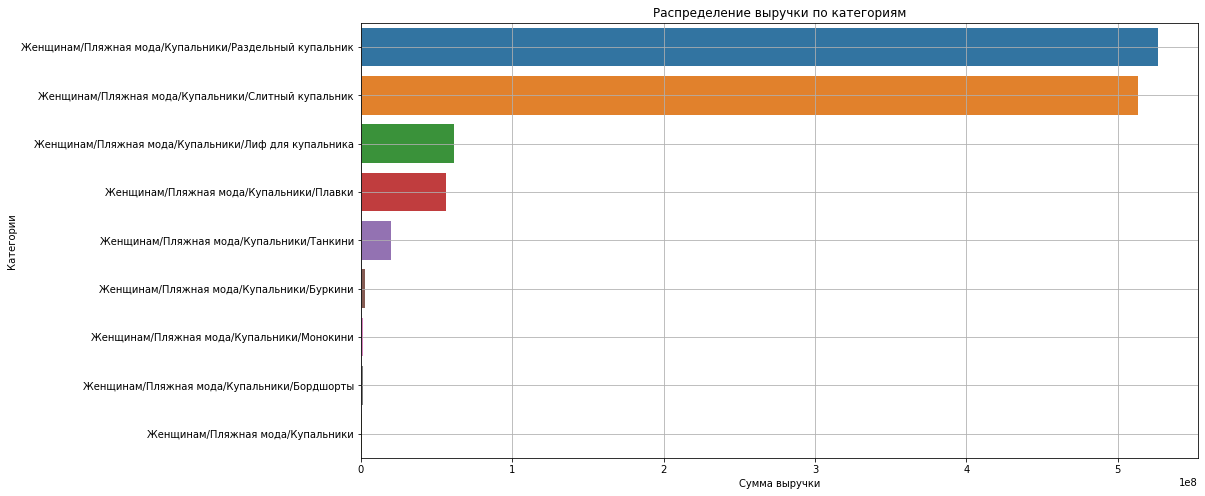

In [139]:
# Построим распределение выручки по категориям

plt.figure(figsize=(15, 8))
sns.barplot(x='revenue', y=revenue.index, data=revenue.reset_index())
plt.title('Распределение выручки по категориям')
plt.xlabel('Сумма выручки')
plt.ylabel('Категории')
plt.grid()
plt.show()

Лучшая выручка в категории «Раздельный купальник».

In [140]:
sales = make_table('sales', 'sum', '{:.2f}')

,sales
category,
Женщинам/Пляжная мода/Купальники/Слитный купальник,251219.00
Женщинам/Пляжная мода/Купальники/Раздельный купальник,232638.00
Женщинам/Пляжная мода/Купальники/Плавки,48832.00
Женщинам/Пляжная мода/Купальники/Лиф для купальника,35885.00
Женщинам/Пляжная мода/Купальники/Танкини,11065.00
Женщинам/Пляжная мода/Купальники/Бордшорты,845.00
Женщинам/Пляжная мода/Купальники/Буркини,526.00
Женщинам/Пляжная мода/Купальники/Монокини,470.00
Женщинам/Пляжная мода/Купальники,256.00


Но больше всего продаж в категории «Слитный купальник».

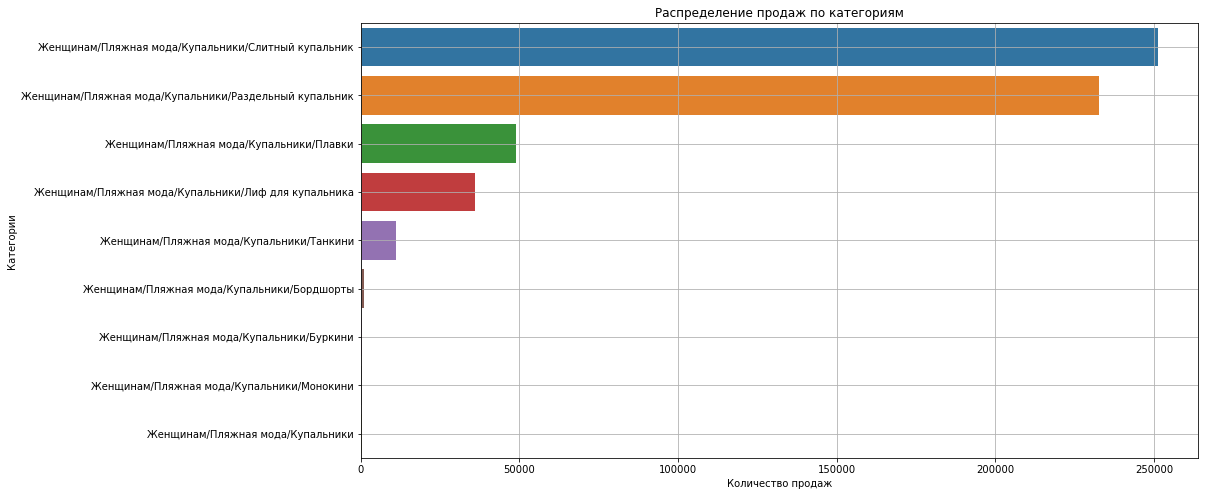

In [141]:
# Построим распределение продаж по категориям

plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y=sales.index, data=sales.reset_index())
plt.title('Распределение продаж по категориям')
plt.xlabel('Количество продаж')
plt.ylabel('Категории')
plt.grid()
plt.show()

Посмотрим топ-30 продаваемых позиций.

In [142]:
top_SKU = new_data.sort_values(by='sales', ascending=False).head(30)

display(top_SKU.drop(columns=['hax_video', 'has_3d']))

,sku,name,category,brand,seller,color,balance,balance_fbs,comments,final_price,...,country,gender,first_date,first_comment_date,pics_count,comments_valuation,card_rating,subject,purchase,purchase_after_return
0,84982268,Слитный Купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,GROSSISTA,ООО ИН Тайм,черный,4469,0,6104,798.0,...,Россия,Женский,2022-06-15,2022-06-13,4,"4,8",67,Белье / Слитный купальник,46,41
1,3454022,Купальник слитный женский,Женщинам/Пляжная мода/Купальники/Слитный купал...,KICKERS,ООО Викториас Лайн,черный,9631,0,25116,833.0,...,Россия,Женский,2020-01-25,2021-07-31,9,"4,8",80,Белье / Слитный купальник,46,41
3,126994162,Слитный купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,EDGE PLANET,ООО ИН Тайм,NaN,1433,0,967,746.0,...,NaN,NaN,2022-10-29,1970-01-01,0,0,0,Белье / Слитный купальник,46,41
6,33307040,Купальник женский слитные,Женщинам/Пляжная мода/Купальники/Слитный купал...,Mustela.,ИП Царев Игорь Александрович,черный,618,1,1766,767.0,...,NaN,Женский,2021-07-08,2021-08-12,4,"4,6",80,Белье / Слитный купальник,46,41
4,72998984,Слитный Купальник,Женщинам/Пляжная мода/Купальники/Слитный купал...,ARDIANI,ООО ИН Тайм,черный,4511,0,1555,899.0,...,Россия,Женский,2022-05-24,2022-05-30,8,"4,8",73,Белье / Слитный купальник,46,41
25,3454023,Купальник слитный женский,Женщинам/Пляжная мода/Купальники/Слитный купал...,KICKERS,ООО Викториас Лайн,синий,2821,0,25116,966.0,...,Россия,Женский,2020-01-25,2021-07-31,9,"4,8",80,Белье / Слитный купальник,46,41
48,113365449,Плавки женские купальные,Женщинам/Пляжная мода/Купальники/Плавки,YUGGO,ИП Лапин,черный,37,0,517,900.0,...,Россия,Женский,2022-07-15,2022-07-20,5,"4,8",83,Белье / Плавки,66,63
18,33267595,Купальник раздельный стринги,Женщинам/Пляжная мода/Купальники/Раздельный ку...,DETACHED,ИП Побат Никита Олегович,черный,1620,0,1518,1289.0,...,Россия,Женский,2021-06-27,2021-07-01,4,"4,6",87,Белье / Раздельный купальник,42,38
60,3454025,Купальник слитный женский,Женщинам/Пляжная мода/Купальники/Слитный купал...,KICKERS,ООО Викториас Лайн,красный,865,0,25116,966.0,...,Россия,Женский,2020-01-25,2021-07-31,9,"4,8",80,Белье / Слитный купальник,46,41
10,53006134,"Слитный Купальник женский на пляж, сплошной сп...",Женщинам/Пляжная мода/Купальники/Слитный купал...,BUSTOGRAM SWIM,ООО АМА,"черный,чернильный,иссиня-черный,горький шокола...",414,0,1154,1975.0,...,Россия,Женский,2021-12-17,2021-12-20,13,"4,8",100,Белье / Слитный купальник,46,41


Теперь посмотрим распределение цен, комментариев, оценки. 

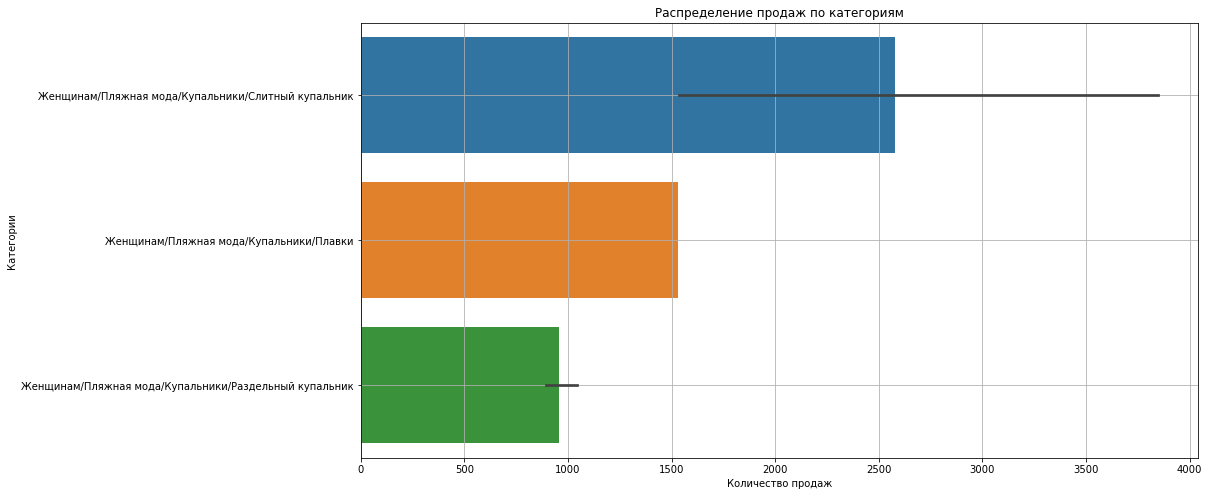

In [143]:
plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='category', data=top_SKU)
plt.title('Распределение продаж по категориям')
plt.xlabel('Количество продаж')
plt.ylabel('Категории')
plt.grid()
plt.show()

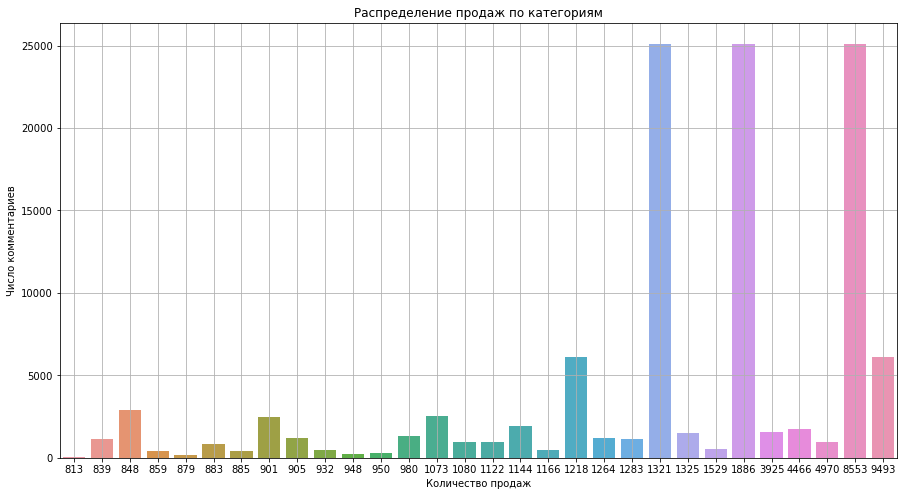

In [144]:
plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='comments', data=top_SKU)
plt.title('Распределение продаж по категориям')
plt.xlabel('Количество продаж')
plt.ylabel('Число комментариев')
plt.grid()
plt.show()

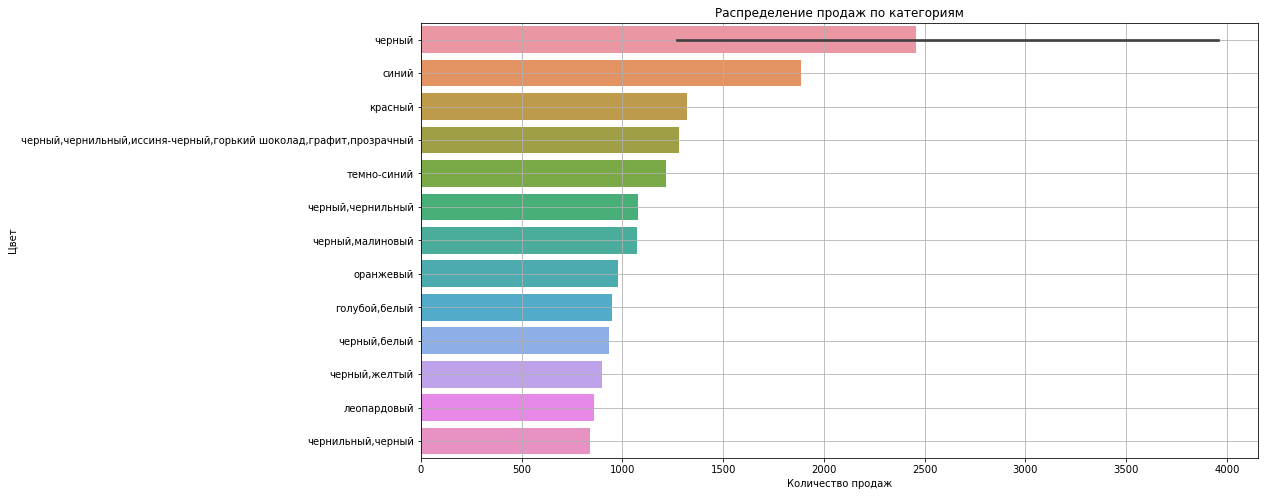

In [145]:
plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='color', data=top_SKU)
plt.title('Распределение продаж по категориям')
plt.xlabel('Количество продаж')
plt.ylabel('Цвет')
plt.grid()
plt.show()

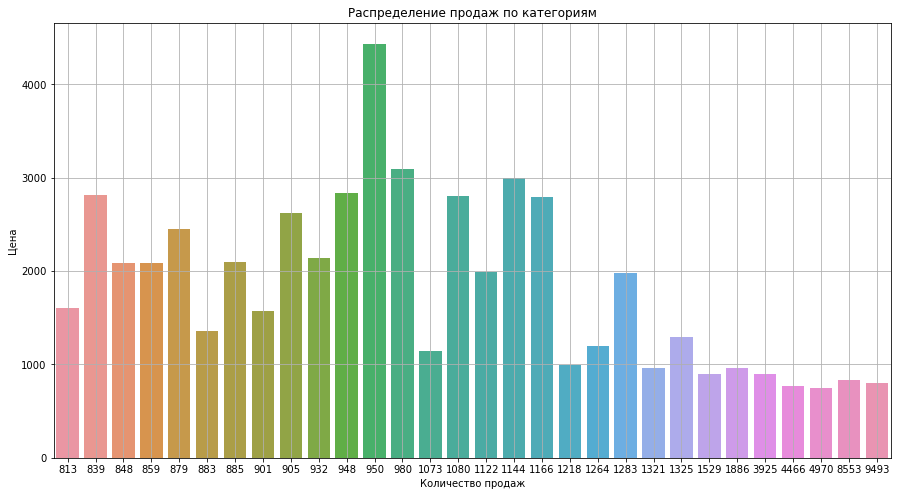

In [146]:
plt.figure(figsize=(15, 8))
sns.barplot(x='sales', y='final_price', data=top_SKU)
plt.title('Распределение продаж по категориям')
plt.xlabel('Количество продаж')
plt.ylabel('Цена')
plt.grid()
plt.show()

Нам интересна общая выручка. Посмотрим зависимость выручки от цены в топ-30.

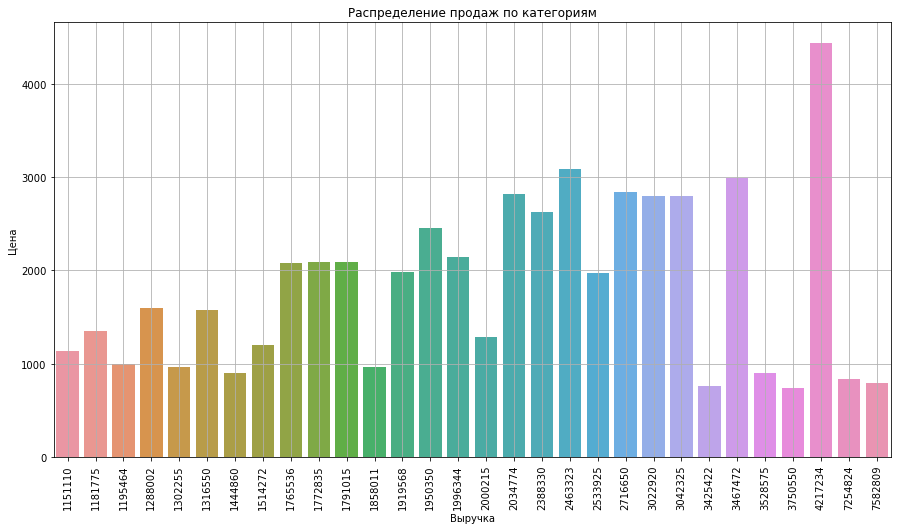

In [147]:
plt.figure(figsize=(15, 8))
sns.barplot(x='revenue', y='final_price', data=top_SKU)
plt.title('Распределение продаж по категориям')
plt.xlabel('Выручка')
plt.xticks(rotation=90)
plt.ylabel('Цена')
plt.grid()
plt.show()

В нашем топе лучшие продажи в категории «Слитный купальник» чёрного цвета. Число комментариев имеет значение. Купальники стоимостью до 1000 р продаются лучше всего, но цена и выручка положительно коррелируются, то есть чем выше цена, тем больше выручка на купальники до 3000 рублей. 

## Вывод:

Отделу закупок рекомендуем присмотреться к чёрным слитным купальникам средней итоговой стоимостью до 3000 рублей.

